## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results , mouse_metadata , on = "Mouse ID", how = "left")
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
print(mouse_metadata)
print(f"\nTotal number of mice after merging : {len(df['Mouse ID'].unique())}")

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]

Total number of mice after merging : 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = df[df.duplicated(["Mouse ID", "Timepoint"])]
print(f"Duplicated Mouse ID: {duplicate_mouse['Mouse ID'].unique()[0]}")

Duplicated Mouse ID: g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for i in duplicate_mouse.index:
    df = df.drop(i)
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
print(f"\nTotal number of mice in the clean DataFrame : {len(df['Mouse ID'].unique())}")


Total number of mice in the clean DataFrame : 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_gb = df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means = regimen_gb['Tumor Volume (mm3)'].mean()
variances = regimen_gb['Tumor Volume (mm3)'].var()
std_dev = regimen_gb['Tumor Volume (mm3)'].std()
sems = regimen_gb['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_stat_df = pd.DataFrame({"mean" : means,
                         "variance" : variances,
                          "standard deviation" : std_dev,
                         "SEM": sems
                         })
regimen_stat_df

,mean,variance,standard deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.393463,43.138803,6.568014,0.525862
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_gb['Tumor Volume (mm3)'].agg(['mean','var','std','sem'])

,mean,var,std,sem
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.393463,43.138803,6.568014,0.525862
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ceftamin'),
 Text(2, 0, 'Infubinol'),
 Text(3, 0, 'Ketapril'),
 Text(4, 0, 'Naftisol'),
 Text(5, 0, 'Placebo'),
 Text(6, 0, 'Propriva'),
 Text(7, 0, 'Ramicane'),
 Text(8, 0, 'Stelasyn'),
 Text(9, 0, 'Zoniferol')]

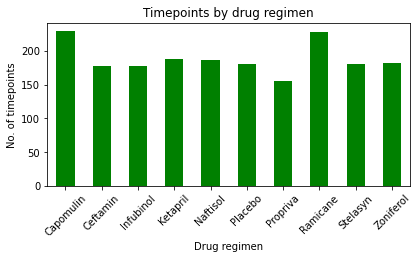

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimens = df["Drug Regimen"].unique().tolist()
regimens.sort()
timepoint = []

for x in regimens:
    timepoint.append(df.loc[df["Drug Regimen"] == x, "Timepoint"].count())

regimen_df = pd.DataFrame({"No of timepoint" : timepoint }, index = regimens)

title = "Timepoints by drug regimen"

pandaschart = regimen_df.plot(kind = "bar", xlabel = "Drug regimen", ylabel = "No. of timepoints", \
                              figsize = (6.5,3) , title = title, sort_columns = True, legend = False, color = "green")

pandaschart.set_xticklabels(regimens, rotation = 45)

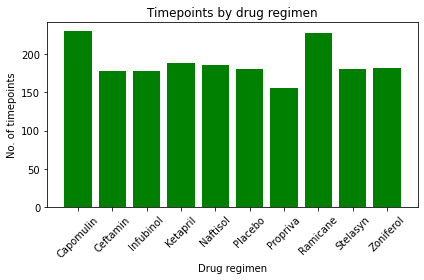

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_df = regimen_gb["Timepoint"].count()
x = np.arange(1 , len(timepoints_df)+1 , 1)
labels = timepoints_df.keys()

plt.bar(x, timepoints_df, color = "green")
plt.xticks(x, labels, rotation = 45)
plt.title(title)
plt.xlabel("Drug regimen")
plt.ylabel("No. of timepoints")
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Distribution of mice'}, ylabel='Sex'>

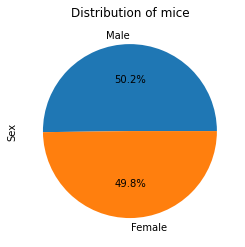

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders = mouse_metadata["Sex"].value_counts()

genders.plot(kind = "pie",   autopct = "%1.1f%%", title = "Distribution of mice")

Text(0.5, 1.0, 'Distribution of mice')

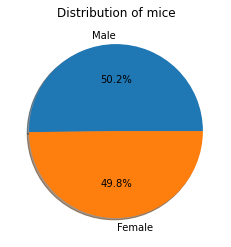

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genders , labels = genders.keys(),  autopct = "%1.1f%%"  , shadow = True)

plt.title("Distribution of mice") 

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens_df = df.loc[(df["Drug Regimen"] == "Capomulin") | (df["Drug Regimen"] == "Ramicane") | \
                         (df["Drug Regimen"] == "Infubinol") | (df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = four_regimens_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume_df = pd.merge(df, greatest_timepoint_df, on = ["Mouse ID" , "Timepoint"], how = "right")
final_volume_df

# Put treatments into a list for for loop (and later for plot labels)
treatments = final_volume_df["Drug Regimen"].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    empty_list = final_volume_df.loc[final_volume_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(empty_list)
    

    # Determine outliers using upper and lower bounds
    quartiles = empty_list.quantile([.25, .5 , .75])
    lower_quar = quartiles[.25]    
    upper_quar = quartiles[.75]
    IQR = upper_quar - lower_quar
    print(f"For {drug}:")
    print(f"    The lower quartile: %.3f" %lower_quar)
    print(f"    The upper quartile: %.3f" %upper_quar)
    print(f"    The IQR: %.3f" %IQR)

    lower_bound = lower_quar - (1.5 * IQR)
    upper_bound = upper_quar + (1.5 * IQR)
    print(f"    Values below %.2f and above %.2f could be outliers." %(lower_bound , upper_bound))

    outliners = [v for v in empty_list if (v > upper_bound) | (v < lower_bound)]
    print(f"    Outliners: {outliners} \n")   

For Infubinol:
    The lower quartile: 54.049
    The upper quartile: 65.526
    The IQR: 11.477
    Values below 36.83 and above 82.74 could be outliers.
    Outliners: [36.3213458] 

For Ceftamin:
    The lower quartile: 48.722
    The upper quartile: 64.300
    The IQR: 15.578
    Values below 25.36 and above 87.67 could be outliers.
    Outliners: [] 

For Ramicane:
    The lower quartile: 31.560
    The upper quartile: 40.659
    The IQR: 9.099
    Values below 17.91 and above 54.31 could be outliers.
    Outliners: [] 

For Capomulin:
    The lower quartile: 32.377
    The upper quartile: 40.159
    The IQR: 7.782
    Values below 20.70 and above 51.83 could be outliers.
    Outliners: [] 



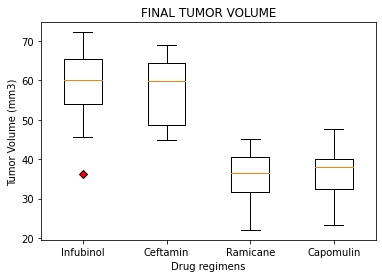

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig , axi = plt.subplots()
axi.set_xlabel("Drug regimens")
axi.set_ylabel("Tumor Volume (mm3)")
axi.set_title("FINAL TUMOR VOLUME")
red_diamon = {"markerfacecolor" : "r" , "marker" : "D"}
axi.boxplot(tumor_vol, flierprops = red_diamon)
axi.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

Mouse treated with Capomulin : ['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


Text(0.5, 1.0, 'Mouse y793 treated with Capomulin ')

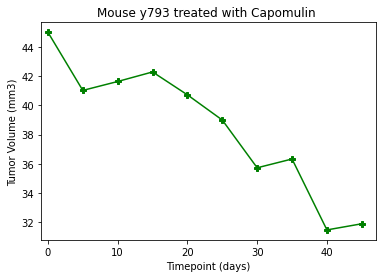

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug = "Capomulin"
mouse_list = df.loc[df["Drug Regimen"] == drug ,"Mouse ID"].unique()
print(f"Mouse treated with {drug} : {mouse_list}")
mouse = "y793"
capomulin_vol = df.loc[(df["Drug Regimen"] == drug) & (df["Mouse ID"] == mouse) , "Tumor Volume (mm3)"]
capomulin_timepoint = df.loc[(df["Drug Regimen"] == drug) & (df["Mouse ID"] == mouse) , "Timepoint"]
plt.plot(capomulin_timepoint , capomulin_vol, marker = "P", color= "green")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-1 , max(capomulin_timepoint) + 2)
plt.title(f"Mouse {mouse} treated with {drug} ")   

Text(0.5, 1.0, 'Average tumor volume vs. mouse weight')

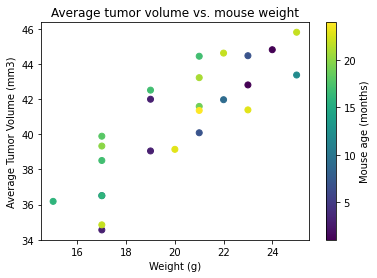

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ave_tumor = []
weight = []
age = []
for mouse in mouse_list:
    ave_tumor.append(df.loc[(df["Drug Regimen"] == drug) & (df["Mouse ID"] == mouse) , "Tumor Volume (mm3)"].mean())
    weight.append(df.loc[(df["Drug Regimen"] == drug) & (df["Mouse ID"] == mouse) , "Weight (g)"].mean())
    age.append(mouse_metadata.loc[mouse_metadata["Mouse ID"] == mouse , 'Age_months'])
plt.scatter(weight , ave_tumor , marker = "o", c = age)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.colorbar(label = "Mouse age (months)")
plt.title("Average tumor volume vs. mouse weight")

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
ave_tumor_ser = pd.Series(ave_tumor) 
weight_ser = pd.Series(weight)
corelation = st.pearsonr(weight_ser , ave_tumor_ser)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen: {round(corelation[0],2)}")



The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen: 0.84


In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_ser , ave_tumor_ser)

regress_value = weight_ser * slope + intercept

line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
line_eq

'y = 0.95x + 21.55'

Text(0.5, 1.0, 'Average tumor volume vs. mouse weight')

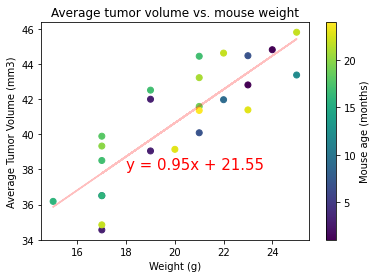

In [21]:
plt.plot(weight_ser, regress_value, color = "r", alpha = 0.25)
plt.annotate(line_eq,(18,38) , fontsize=15, color="red")
plt.scatter(weight , ave_tumor , marker = "o", c = age)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.colorbar(label = "Mouse age (months)")
plt.title("Average tumor volume vs. mouse weight")

# Final Analysis:

1. From the summary statistic table, the average tumour volume appeared smallest in mouse treated with Ramicane, Capomulin, Propriva, Ceftamin and Infubinol. This proves the effectiveness of these drugs in reducing tumour volume in mouse.

2. Ramicane on average reduces tumour volume more than Capomulin. However, from the bar chart Timepoints by drug regimen, it shows that mouse is less likely to die in drug regime Capomulin compared to Ramicane (230 versus 228 timepoints). Therefore, it is safest to treat tumour with Capomulin.

3. The average tumour volume in mouse strongly and positively corelates to the mouse weight (r = 0.84) and it can be estimated based on a linear equation: 
    y = 0.95x + 21.55
    (x: mouse weight, y: average tumour volume)
    
4. From whisker box, we found only one outliner from Infubinol regimen, this means that the above statistical analysis is not negatively bias by outliners
